## Observations and Insights 

In [686]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import random
%matplotlib inline
import seaborn as sns
from pandas import Series, DataFrame
from matplotlib.pylab import rcParams
sns.set()
rcParams['figure.figsize']=14,7
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right']=False

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [687]:
# Combine the data into a single dataset

mouse_meta_study_df = pd.merge(mouse_metadata, study_results, how = "left", on=["Mouse ID"])

# Display the data table for preview
mouse_meta_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [688]:
# Checking the number of mice.
len(mouse_meta_study_df)


1893

In [689]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

dup_mice_time = mouse_meta_study_df[mouse_meta_study_df.duplicated(["Mouse ID", "Timepoint"])]
dup_mice_time

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [749]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#https://www.journaldev.com/33488/pandas-drop-duplicate-rows-drop_duplicates-function

clean_mouse_df = mouse_meta_study_df.drop_duplicates("Mouse ID")
clean_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [750]:
# Checking the number of mice in the clean DataFrame.
len(clean_mouse_df)


249

## Summary Statistics

In [692]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

regimen_groups = mouse_meta_study_df.groupby(mouse_meta_study_df["Drug Regimen"])


mean=regimen_groups["Tumor Volume (mm3)"].mean()
median=regimen_groups["Tumor Volume (mm3)"].median()
variance=regimen_groups["Tumor Volume (mm3)"].var()
std_dev=regimen_groups["Tumor Volume (mm3)"].std()
std_err=regimen_groups["Tumor Volume (mm3)"].sem()

In [693]:
# Assemble the resulting series into a single summary dataframe.
#PANDAS DATA FRAME METHOD 

summary_statistics_df = {
    "Mean Tumor Volume":mean, "Median Tumor Volume": median, "Tumor Volume Variance": variance, "Tumor Volume Std. Dev.": std_dev, "Tumor Volume Std. Err.": std_err}

single_sum_df=pd.DataFrame(summary_statistics_df)
single_sum_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [752]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
# MATLIB DATA FRAME 

agg_df = regimen_groups["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem'])
agg_df


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [695]:
mouse_drug_group = mouse_meta_study_df.groupby(["Drug Regimen"]).count()["Mouse ID"]
mouse_drug_group


Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

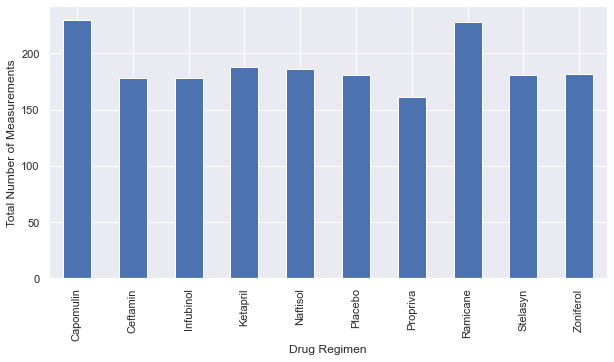

In [764]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

#Group Drug Regiment and Mouse ID together to plot 
mouse_drug_group.plot(kind="bar", figsize=(10,5))

#Chart Titles
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Measurements");

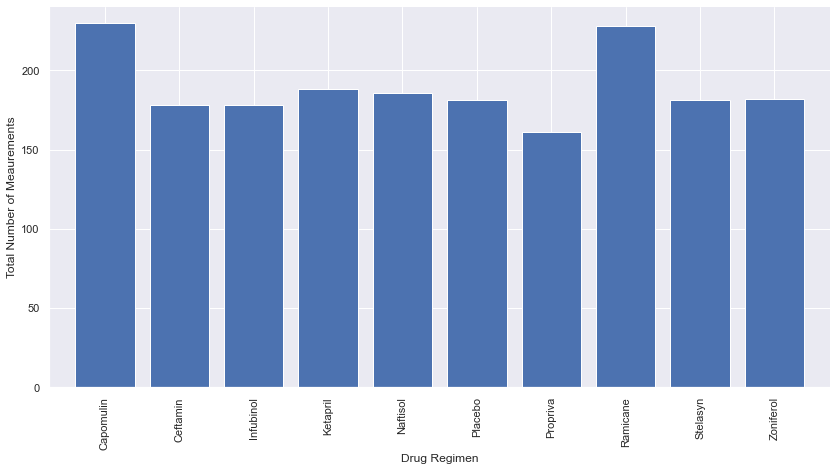

In [763]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
mice = [230,178,178,188,186,181,161,228,181,182]
x_axis = np.arange(len(mouse_drug_group))

plt.bar(x_axis,mice,color='b', alpha = 1.0, align = "center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol","Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]);
plt.xticks(rotation=90)

#set the x limits of the current chart 
plt.xlim(-0.75, len(x_axis)-0.25)

#set the y limits of the current chart 
plt.ylim(0,max(mice)+10)

#Give our chart some labels and titles 
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Meaurements");



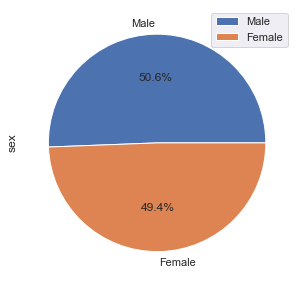

In [768]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#PANDAS PIE CHART 

#create new data frame for sex and mouse ID to count values 
mouse_sex_group = mouse_meta_study_df.groupby(["Sex"]).count()["Mouse ID"]

mouse_sex_df = pd.DataFrame({'sex':[958,935]},
                            index=['Male', 'Female'],)
plt.title=("Sex")
plot = mouse_sex_df.plot.pie(y='sex', figsize=(5,5,), autopct='%1.1f%%')

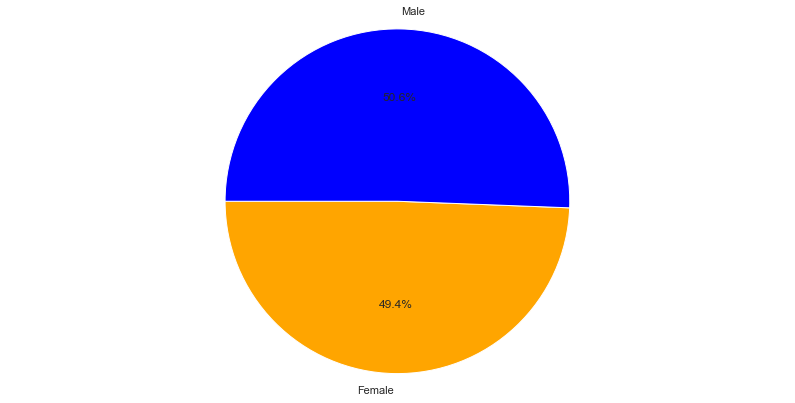

In [771]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#labels for the sections of the pie chart 
labels = ["Female", "Male"]

#the values of each section of the pie chart 
sizes=[935,958]

# the colors of each section
colors=["orange", "blue"]

#create pie chart
plt.pie(sizes, labels=labels,colors=colors,
       autopct='%1.1f%%', startangle=180);

#pie chart with equal axes
plt.axis("equal");


## Quartiles, Outliers and Boxplots

In [705]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#capture drug specific four regimens using isin to check value exists
##https://www.geeksforgeeks.org/python-pandas-dataframe-isin/

four_drug_df = sort_mouse_meta_df[sort_mouse_meta_df["Drug Regimen"].isin(["Capomulin", "Infubinol", "Ramicane", "Ceftamin"])]

minimized_four_drug_df = four_drug_df[["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]]
minimized_four_drug_df


,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,k403,Ramicane,0,45.000000
531,a685,Infubinol,0,45.000000
1551,t573,Ceftamin,0,45.000000
524,a577,Infubinol,0,45.000000
1577,u149,Ceftamin,0,45.000000
...,...,...,...,...
204,i738,Capomulin,45,37.311846
194,j989,Ramicane,45,36.134852
637,c139,Infubinol,45,72.226731
184,i177,Ramicane,45,33.562402


In [772]:
#Start by getting the last (greatest) timepoint for each mouse
#Order the timepoint column to see end 

time_ordered = minimized_four_drug_df.sort_values(["Timepoint"], ascending = True)
time_ordered.tail(10)

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
327,a411,Ramicane,45,38.407618
473,a251,Infubinol,45,65.525743
493,a275,Ceftamin,45,62.999356
254,i334,Ramicane,45,36.374510
244,g288,Capomulin,45,37.074024
234,r811,Ramicane,45,37.225650
540,a685,Infubinol,45,66.083066
224,w914,Capomulin,45,36.041047
272,d251,Ramicane,45,37.311236
174,a644,Ramicane,45,32.978522


In [707]:
timepoint_last = time_ordered.groupby(["Mouse ID", "Drug Regimen"]).last()["Timepoint"]
timepoint_last

Mouse ID  Drug Regimen
a203      Infubinol       45
a251      Infubinol       45
a275      Ceftamin        45
a411      Ramicane        45
a444      Ramicane        45
                          ..
y769      Ceftamin        45
y793      Capomulin       45
y865      Ceftamin        45
z578      Ramicane        45
z581      Infubinol       45
Name: Timepoint, Length: 100, dtype: int64

In [723]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

merge_timepoint_meta_study= pd.merge(mouse_meta_study_df, timepoint_last, how= "left", on = ["Drug Regimen"])
merge_timepoint_meta_study

##remove blank data 
df_to_plot = merge_timepoint_meta_study.dropna(how='any')
df_to_plot

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y
0,k403,Ramicane,Male,21,16,0,45.000000,0,45.0
1,k403,Ramicane,Male,21,16,0,45.000000,0,45.0
2,k403,Ramicane,Male,21,16,0,45.000000,0,45.0
3,k403,Ramicane,Male,21,16,0,45.000000,0,45.0
4,k403,Ramicane,Male,21,16,0,45.000000,0,30.0
...,...,...,...,...,...,...,...,...,...
21404,z581,Infubinol,Female,24,25,45,62.754451,3,15.0
21405,z581,Infubinol,Female,24,25,45,62.754451,3,20.0
21406,z581,Infubinol,Female,24,25,45,62.754451,3,30.0
21407,z581,Infubinol,Female,24,25,45,62.754451,3,45.0


In [803]:
# Put treatments into a list for for loop (and later for plot labels)
#received help from tutor Ibrahim Jabarkhil on for loop 

treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
tumor_volume=[]

for treatment in treatment_list:
    time_volume=time_ordered.loc[time_ordered["Drug Regimen"]== treatment, "Tumor Volume (mm3)"]
# Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume.append(time_volume)
    

# Calculate the IQR and quantitatively determine if there are any potential outliers.
#the final tumor volume of each mouse across four of the treatment regime
    
    quartiles = time_volume.quantile([.25,.5,.75])
    lowerq=quartiles[0.25]
    upperq=quartiles[0.75]
    iqr = upperq-lowerq
    

    lower_bound = lowerq-(1.5*iqr)
    upper_bound = upperq + (1.5*iqr)


#Print Drug Names, IQRs 
    print(treatment)
    print(f"The lower quartile is: {lowerq}")
    print(f"The upper quartile is: {upperq}")
    print(f"The interquartile range is: {iqr}")
    print(f"The median is : {quartiles[0.5]}\n")
    
#Outliers
    print("Treatment Specific Outliers")
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.\n")


Capomulin
The lower quartile is: 37.685932865
The upper quartile is: 45.0
The interquartile range is: 7.314067135000002
The median is : 41.557808879999996

Treatment Specific Outliers
Values below 26.714832162499995 could be outliers.
Values above 55.9711007025 could be outliers.

Ramicane
The lower quartile is: 36.67463458499999
The upper quartile is: 45.0
The interquartile range is: 8.325365415000007
The median is : 40.67323554

Treatment Specific Outliers
Values below 24.18658646249998 could be outliers.
Values above 57.48804812250001 could be outliers.

Infubinol
The lower quartile is: 47.3123533
The upper quartile is: 57.314443967500004
The interquartile range is: 10.002090667500006
The median is : 51.82058438

Treatment Specific Outliers
Values below 32.309217298749985 could be outliers.
Values above 72.31757996875001 could be outliers.

Ceftamin
The lower quartile is: 47.208427112500004
The upper quartile is: 56.801437570000004
The interquartile range is: 9.5930104575
The median

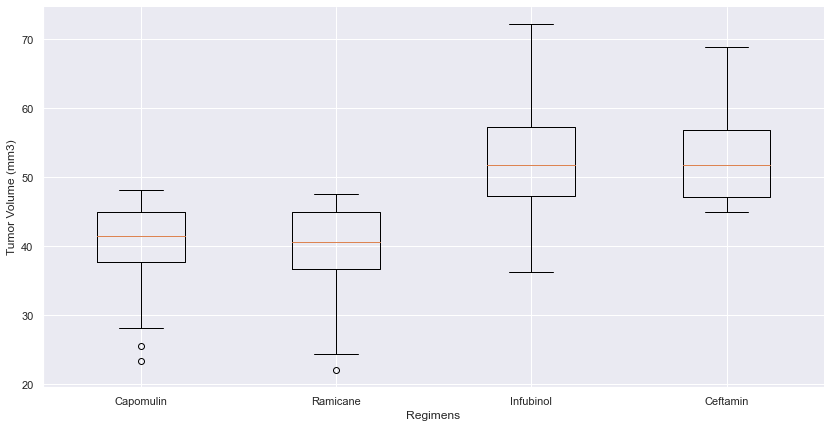

In [805]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interestp

plt.boxplot(tumor_volume, labels=treatment_list)
plt.title=("Final Tumor Volume of Each Mouse Across Four Regimens")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Regimens")
print()



## Line and Scatter Plots

In [543]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

tumor_time_df = mouse_meta_study_df.groupby(["Tumor Volume (mm3)"]).count()["Timepoint"]
tumor_time_df

# max x value for chart
x_limit = 80


In [17]:
# Generate a scatter plot depicting mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [807]:
# Calculate the correlation coefficient for mouse weight versus average tumor volume 
#Calculate the linear regression model for mouse weight versus average tumor volume 
#The linear regression model has been plotted depicting moue weight verus average tumor volume 
